# Random Forest Project 

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Lending club had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016), so let's check out some of their data and keep the context in mind. This data is from before they even went public.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. You can download the data from [here](https://www.lendingclub.com/info/download-data.action) or just use the csv already provided. It's recommended you use the csv provided as it has been cleaned of NA values.

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Get the data

In [2]:
loans = pd.read_csv('loan_data.csv')

### Check head, info and description of the DataFrame

In [3]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000




# Exploratory Data Analysis



Let's visualize reasons that contributed to acquiring of loans:

[Text(0, 0, 'debt_consolidation'),
 Text(0, 0, 'credit_card'),
 Text(0, 0, 'all_other'),
 Text(0, 0, 'home_improvement'),
 Text(0, 0, 'small_business'),
 Text(0, 0, 'major_purchase'),
 Text(0, 0, 'educational')]

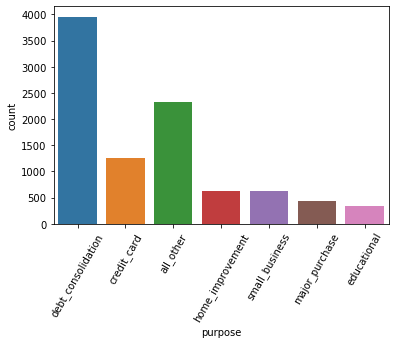

In [6]:
ax = sns.countplot(loans['purpose'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)

FICO credit score based on the credit.policy:

Text(0.5, 0, 'FICO')

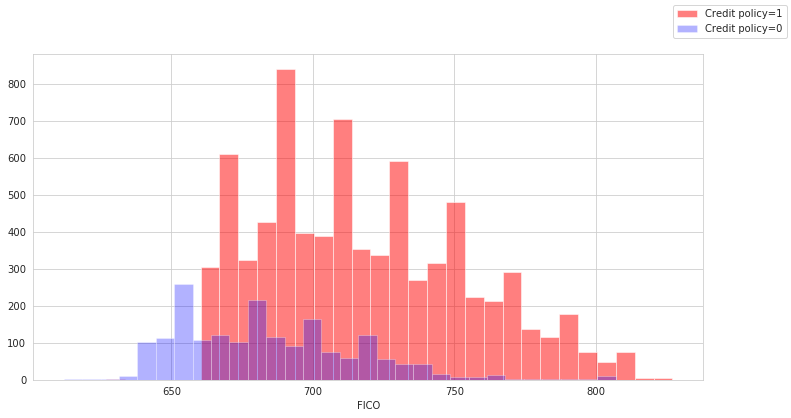

In [7]:
sns.set_style('whitegrid')  #for cleaner plots

ax = plt.figure(figsize=(12,6))
plt.hist(loans[loans['credit.policy']==1]['fico'],
         bins=30,
         color='red', 
         label='Credit policy=1',
         alpha=0.5)
plt.hist(loans[loans['credit.policy']==0]['fico'],
         bins=30,
         color='blue',
         label='Credit policy=0',
         alpha=0.3)
ax.legend()
plt.xlabel('FICO')

same plot selecting with the not fully paid column 

Text(0.5, 0, 'FICO')

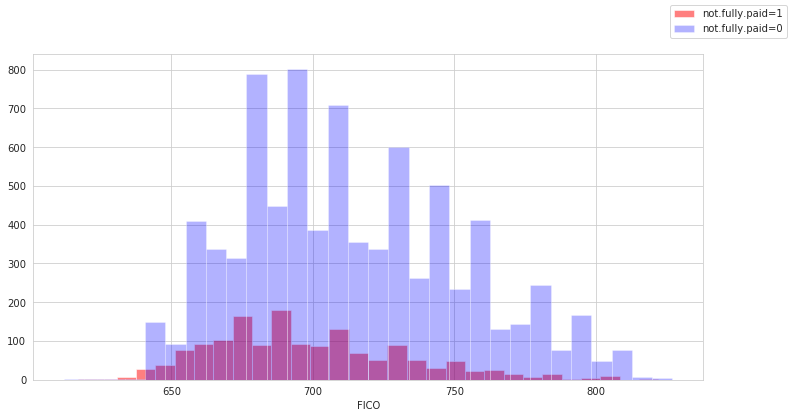

In [8]:
ax = plt.figure(figsize=(12,6))
plt.hist(loans[loans['not.fully.paid']==1]['fico'],
         bins=30,
         color='red', 
         label='not.fully.paid=1',
         alpha=0.5)
plt.hist(loans[loans['not.fully.paid']==0]['fico'],
         bins=30,
         color='blue',
         label='not.fully.paid=0',
         alpha=0.3)
ax.legend()
plt.xlabel('FICO')

Let's see the trend between FICO score and interest rate

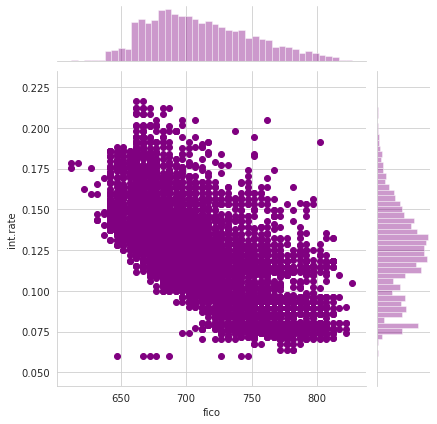

In [9]:
sns.jointplot(x='fico', y='int.rate', data=loans, color='purple')

Let's create lmplots to see if the trend(between FICO and interest rate) differed between not.fully.paid and credit.policy

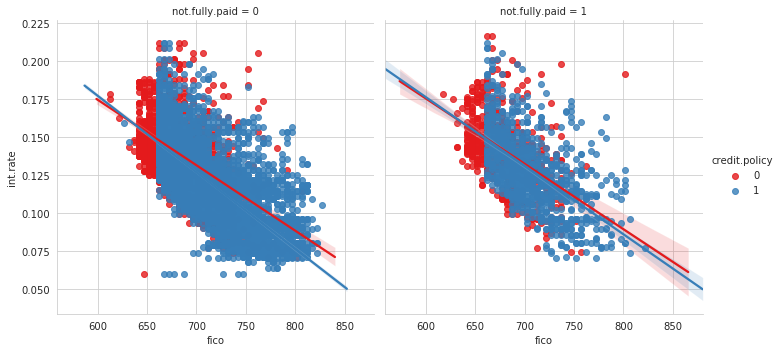

In [10]:
sns.lmplot(x='fico', y='int.rate', 
           data=loans, hue='credit.policy', 
           col='not.fully.paid', palette='Set1')

# Setting up the Data

Let's get ready to set up our data for our Random Forest Classification Model!

In [11]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


### Categorical data

Notice that the purpose column as categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them.

In [12]:
loans['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [13]:
loans_final = pd.get_dummies(loans, columns=['purpose'], drop_first=True)

In [14]:
loans_final.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


## Train Test Split

Now its time to split our data into a training set and a testing set!

In [15]:
X = loans_final.drop('not.fully.paid', axis=1)
y = loans_final['not.fully.paid']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Training a Decision Tree Model

Let's start by training a single decision tree first!

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
dtc = DecisionTreeClassifier()

### Instanciate the model and fit it to the training data

In [21]:
dtc = DecisionTreeClassifier()

In [22]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### Predictions and Evaluation of Decision Tree
Let's create predictions from the test set and create a classification report and a confusion matrix.

In [23]:
pred = dtc.predict(X_test)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
print(classification_report(y_test, pred))
print('\n')
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83      2399
           1       0.20      0.22      0.21       475

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.74      0.73      0.73      2874



[[1981  418]
 [ 372  103]]


## Training the Random Forest model

Now its time to train our Random Forest model!

Let's create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rfc = RandomForestClassifier(n_estimators=400)

In [28]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Predictions and Evaluation of Random Forest

Let's predict off the y_test values and evaluate our model.

In [29]:
predictions = rfc.predict(X_test)

In [30]:
print(classification_report(y_test, predictions))
print('\n')
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2399
           1       0.32      0.01      0.02       475

    accuracy                           0.83      2874
   macro avg       0.58      0.50      0.47      2874
weighted avg       0.75      0.83      0.76      2874



[[2386   13]
 [ 469    6]]


The Random Forest performed better than the Decision Tree

# Model Tuning

**Hyperparameter tuning to increase model accuracy**

We'll use Scikit learn's **RandomizedSearchCV** and compare it with **GridSearchCV**

In [32]:
from sklearn.model_selection import RandomizedSearchCV

Look at parameters used by the current forest

In [38]:
rfc.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 400,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We will try adjusting the following set of hyperparameters:

n_estimators = number of trees in the foreset

max_features = max number of features considered for splitting a node

max_depth = max number of levels in each decision tree

min_samples_split = min number of data points placed in a node before the node is split

min_samples_leaf = min number of data points allowed in a leaf node

bootstrap = method for sampling data points (with or without replacement)

In [39]:
n_estimators = [int(n) for n in np.linspace(200, 1200, 6)]
max_features = ['auto', 'sqrt']
max_depth = [int(n) for n in np.linspace(10, 110, 11)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

Create the random grid

In [41]:
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

In [42]:
random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

On each iteration, the algorithm will choose a difference combination of the features.

Altogether, there are 2 * 12 * 2 * 3 * 3 * 10 = 4320 settings!

**Random Search Training**

Now, we instantiate the random search and fit it like any Scikit-Learn model:

In [46]:
rfc = RandomForestClassifier()

rfc_random = RandomizedSearchCV(estimator=rfc, param_distributions=random_grid,
                                n_iter=100, cv=3, verbose=2, n_jobs=-1)

Fit the random search model

In [50]:
rfc_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  6.7min
/home/lyrax/.local/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 13.4min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

View the best parameters from fitting the random search

In [82]:
rfc_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': True}

**Evaluate random search**

In [52]:
rfc_pred = rfc_random.predict(X_test)

Accuracy of the rfc_random model:

In [70]:
errors = abs(rfc_pred - y_test)
pe = 100 * np.mean(errors - y_test)
accuracy = 100 - pe

print(accuracy)

99.93041057759221


Accuracy of the base model:

In [71]:
errors_base = abs(predictions - y_test)
pe_base = 100 * np.mean(errors_base - y_test)
accuracy_base = 100 - pe_base

print(accuracy_base)

99.75643702157272


That's a 0.18%... improvement

## GridSearchCV

In [72]:
from sklearn.model_selection import GridSearchCV

Create a parameter grid based on the results of the random search:

In [77]:
param_grid = dict(bootstrap = [True], n_estimators=[100, 300, 600, 900], max_depth=[30, 60, 90, 110], 
                 max_features=[2, 3], min_samples_split=[8, 10, 12], min_samples_leaf=[3, 4, 5])

In [78]:
param_grid

{'bootstrap': [True],
 'n_estimators': [100, 300, 600, 900],
 'max_depth': [30, 60, 90, 110],
 'max_features': [2, 3],
 'min_samples_split': [8, 10, 12],
 'min_samples_leaf': [3, 4, 5]}

In [79]:
#the base moedel again

rf = RandomForestClassifier()

Instantiate the grid search model:

In [80]:
grids_model = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

Fit the model

In [81]:
grids_model.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   35.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 17.5min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

Best parameters:


In [83]:
grids_model.best_params_

{'bootstrap': True,
 'max_depth': 60,
 'max_features': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 100}

**Evaluation**

In [84]:
grids_pred = grids_model.predict(X_test)

Accuracy of the grid search:


In [86]:
errors_grid = abs(grids_pred - y_test)
pe_grid = 100 * np.mean(errors_grid - y_test)
accuracy_grid = 100 - pe_grid

print(accuracy_grid)

99.93041057759221


In this case, the random search and the grid search evaluated to the same accuracy.

So any of them can be used with this dataset(in this case)

In [88]:
print(classification_report(grids_pred, y_test))
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91      2872
           1       0.00      0.00      0.00         2

    accuracy                           0.83      2874
   macro avg       0.50      0.42      0.45      2874
weighted avg       1.00      0.83      0.91      2874

              precision    recall  f1-score   support

           0       0.99      0.84      0.91      2855
           1       0.01      0.32      0.02        19

    accuracy                           0.83      2874
   macro avg       0.50      0.58      0.47      2874
weighted avg       0.99      0.83      0.90      2874



After model tuning we can see an increase in precision and f1-score.

We sure did a good job.